In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['digit-recognizer']


## Loading the dataset

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
print(train.shape)
print(train.dtypes)
train.head()

(42000, 785)
label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
print(test.shape)
train.head()

(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 


In [5]:
'''Y_train_count = Y_train.value_counts()
Y_train_count = Y_train_count.sort_index()

plt.figure(figsize=(15,7))
colors = sns.color_palette("icefire", n_colors=len(Y_train_count))
plt.bar(Y_train_count.index,Y_train_count.values, color=colors)
plt.title('Number of digit classes')

plt.xticks(ticks=Y_train_count.index)

plt.tight_layout()
plt.show()'''

'Y_train_count = Y_train.value_counts()\nY_train_count = Y_train_count.sort_index()\n\nplt.figure(figsize=(15,7))\ncolors = sns.color_palette("icefire", n_colors=len(Y_train_count))\nplt.bar(Y_train_count.index,Y_train_count.values, color=colors)\nplt.title(\'Number of digit classes\')\n\nplt.xticks(ticks=Y_train_count.index)\n\nplt.tight_layout()\nplt.show()'

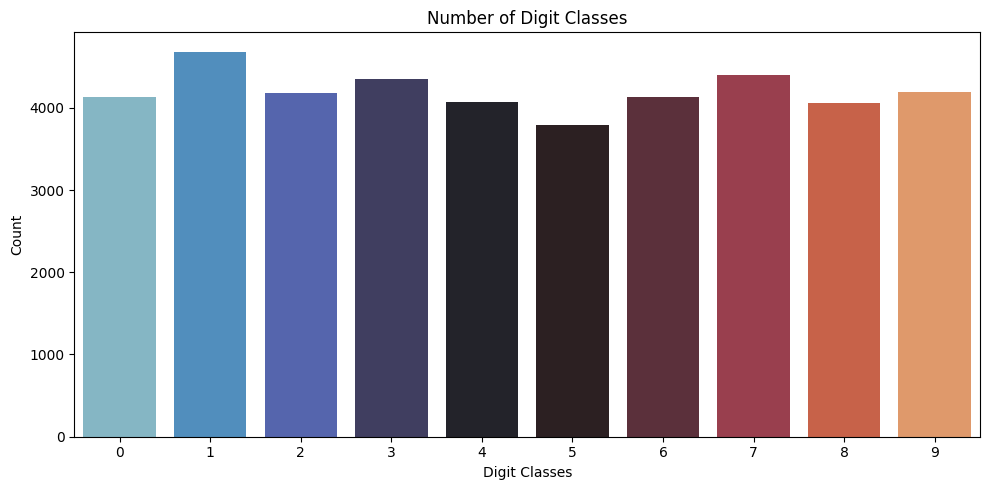

In [6]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the count plot with Seaborn, using the "icefire" color palette
sns.countplot(x=Y_train, palette="icefire")

# Add title and labels
plt.title("Number of Digit Classes")
plt.xlabel("Digit Classes")
plt.ylabel("Count")

# Ensure all x-axis labels (0-9) are shown
plt.xticks(ticks=range(10), labels=range(10))

# Show the plot
plt.tight_layout()
plt.show()


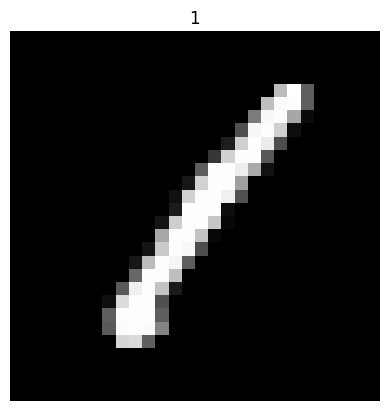

In [7]:
# plot some samples
img = X_train.iloc[0].values
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

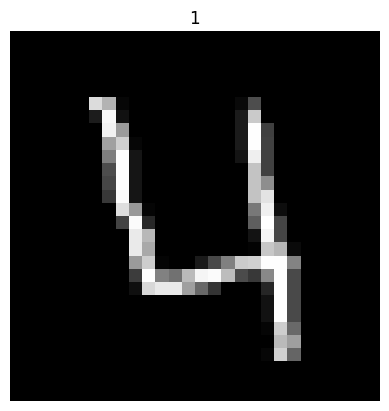

In [8]:
# plot some samples
img = X_train.iloc[3].values
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

# Normalization, Reshape and Label Encoding¶
- Normalization
    - We perform a grayscale normalization to reduce the effect of illumination's differences.
    - If we perform normalization, CNN works faster.
- Reshape
    - Train and test images (28 x 28)
    - We reshape all data to 28x28x1 3D matrices.
    - Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
- Label Encoding
    - Encode labels to one hot vectors
        - 2 => [0,0,1,0,0,0,0,0,0,0]
        - 4 => [0,0,0,0,1,0,0,0,0,0]

In [9]:
# Normalize the data
X_train = X_train / 255
test = test / 255
print(f'X_train shape: {X_train.shape}')
print(f'test shape: {test.shape}')

X_train shape: (42000, 784)
test shape: (28000, 784)


Pixel Value Range: Image pixel values are typically in the range from 0 to 255 (for 8-bit images). Dividing by 255 scales these values to a range of 0 to 1. This helps standardize the input data, making it easier for the neural network to learn.

In [10]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(f'X_train shape: {X_train.shape}')
print(f'test shape: {test.shape}')

X_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


- -1 allows NumPy (or other libraries like TensorFlow or PyTorch) to automatically calculate the size of that dimension based on the total number of elements and the other specified dimensions
- 1 represents the number of color channels (1 for grayscale images)

In [11]:
# Label Encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)

### Train Test Split
- We split the data into train and test sets.
- test size is 10%.
- train size is 90%.

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
# Futher split training set into training and vlaidaiton sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

print(f'Y_train shape: {Y_train.shape}')
print(f'Y_val shape: {Y_val.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (34020, 28, 28, 1)
X_val shape: (3780, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)
Y_train shape: (34020, 10)
Y_val shape: (3780, 10)
Y_test shape: (4200, 10)


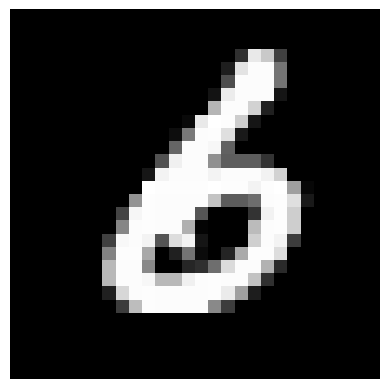

In [13]:
# Some examples
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.axis('off')
plt.show()

* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

# First Convolution Layer
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same',
                 activation = 'relu', input_shape = (28,28,1)))
# MaxPool2D
model.add(MaxPool2D(pool_size=(2,2)))
# Dropout
model.add(Dropout(0.25))
# Second Convolution Layer
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same',
                 activation = 'relu'))
# MaxPool2D
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# Dropout
model.add(Dropout(0.25))

# Fully Conencted
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [15]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [16]:
# Compile the model
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

<a id="14"></a>
### Epochs and Batch Size

* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: [StackOverflow - Epoch vs Iteration when training neural networks](https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks)


In [17]:
epochs = 10 # for better result increase the epochs
batch_size = 250

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

<a id="16"></a>
### Fit the model

In [19]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.4284 - loss: 1.6508 - val_accuracy: 0.9365 - val_loss: 0.2428
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8240 - loss: 0.6157 - val_accuracy: 0.9370 - val_loss: 0.2428
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.8328 - loss: 0.5333 - val_accuracy: 0.9598 - val_loss: 0.1390
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8560 - loss: 0.4434 - val_accuracy: 0.9590 - val_loss: 0.1400
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.8849 - loss: 0.3645 - val_accuracy: 0.9661 - val_loss: 0.1162
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9280 - loss: 0.3112 - val_accuracy: 0.9653 - val_loss: 0.1148
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.9099 - loss: 0.2899 - val_accuracy: 0.9677 - val_loss: 0.1034
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9320 - loss: 0.3027 - val_

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


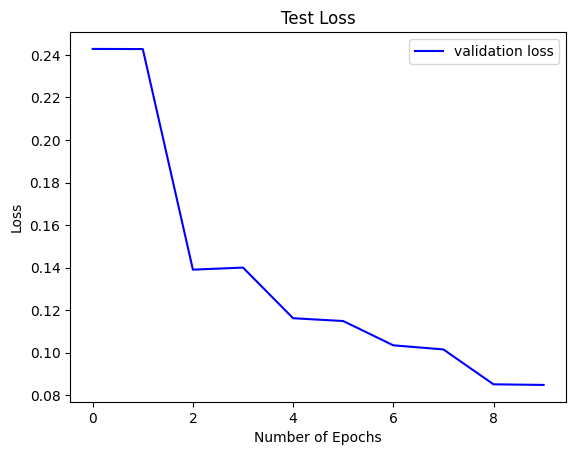

In [20]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


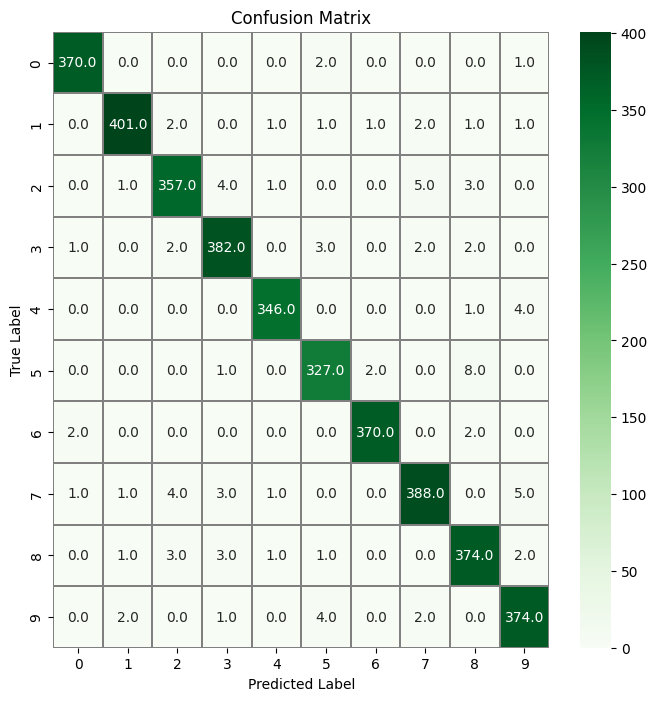

In [21]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()